<a href="https://colab.research.google.com/github/carolsabara/dashboard_dados/blob/main/dpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 40.8 MB/s eta 0:00:00


In [4]:
import pycountry

In [5]:
df= pd.read_csv('https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv')

In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [8]:
df.shape

(133349, 11)

In [9]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [10]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [11]:
novos_nomes= {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'localizacao',
    'company_size': 'tamanho_empresa'
}

In [12]:
df.rename(columns=novos_nomes, inplace=True)

In [13]:
df.columns


Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'localizacao', 'tamanho_empresa'],
      dtype='object')

In [14]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [15]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [16]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [17]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [18]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade']= df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

,count
senioridade,
senior,77241
pleno,40465
junior,12443
executivo,3200


In [19]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [20]:
contrato = {
    'FT': 'integral',
    'CL': 'contrato',
    'PT': 'parcial',
    'FL': 'Freelance'
}
df['contrato']=df['contrato'].replace(contrato)
df['contrato'].value_counts()

,count
contrato,
integral,132563
CT,394
parcial,376
Freelance,16


In [21]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [22]:
tamanho_empresa = {
    'M': 'media',
    'L': 'grande',
    'S': 'pequena'
}
df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [23]:
tamanho_empresa = {
    'M': 'media',
    'L': 'grande',
    'S': 'pequena'
}
df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [24]:
tamanho_empresa = {
    'M': 'media',
    'L': 'grande',
    'S': 'pequena'
}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
media,129561
grande,3574
pequena,214


In [25]:
df.columns


Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'localizacao', 'tamanho_empresa'],
      dtype='object')

In [26]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [27]:
mapa_trabalho={
    0:'presencial',
    100: 'remoto',
    50:'híbrido'
}

df['remoto'] = df['remoto'].replace(mapa_trabalho)
df['remoto'].value_counts()



,count
remoto,
presencial,105312
remoto,27718
híbrido,319


In [28]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,localizacao,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,integral,Data Scientist,USD,US,presencial,US,media
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [29]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
localizacao,0


In [30]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [31]:
df_salarios = pd.DataFrame({
    'nome' : ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario' : [4000, np.nan, 5000, np.nan, 100000]
})
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios


,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [32]:
df.temperaturas = pd.DataFrame({
    'dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'temperatura' :[ 30, np.nan, np.nan, 28, 27]
})
df.temperaturas['preenchido_ffill']= df.temperaturas['temperatura'].ffill()

/tmp/ipython-input-2229535024.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.temperaturas = pd.DataFrame({


In [33]:
df.temperaturas

,dia,temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [34]:
df.temperaturas = pd.DataFrame({
    'dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'temperatura' :[ 30, np.nan, np.nan, 28, 27]
})
df.temperaturas['preenchido_bfill']= df.temperaturas['temperatura'].bfill()

In [35]:
df.temperaturas

,dia,temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [36]:
df_cidades= pd.DataFrame({
    'nome' : ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidade' : ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

df_cidades['cidade_preenchida']= df_cidades['cidade'].fillna('Não informado')
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [37]:
df_limpo= df.dropna()

In [38]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
localizacao,0


In [39]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [40]:
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('Int64'))

In [41]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [42]:
df_limpo.to_csv('dados-imersao.csv', index=False)

<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

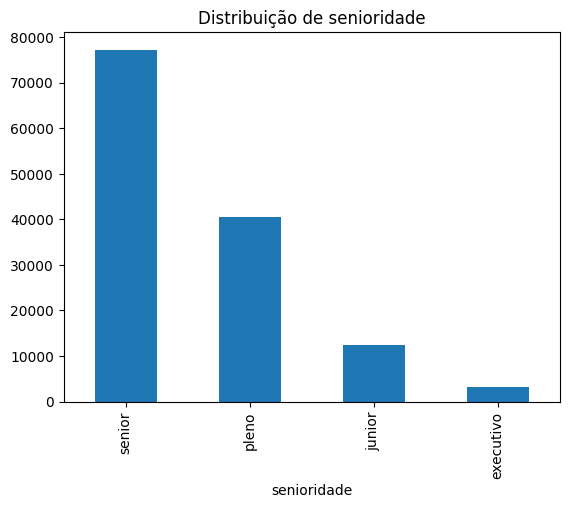

In [43]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de senioridade')

<Axes: xlabel='senioridade', ylabel='usd'>

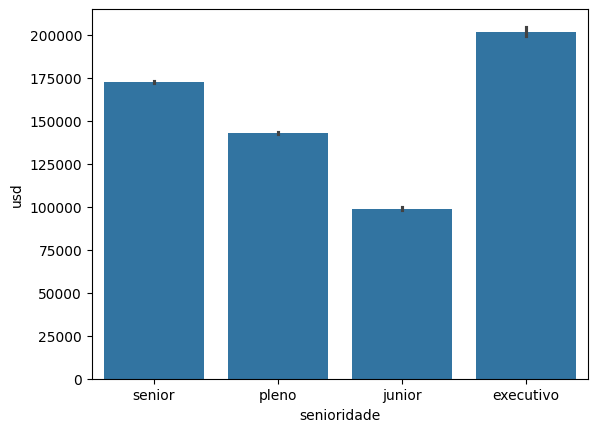

In [44]:
sns.barplot(data=df_limpo, x='senioridade', y='usd', estimator='mean')

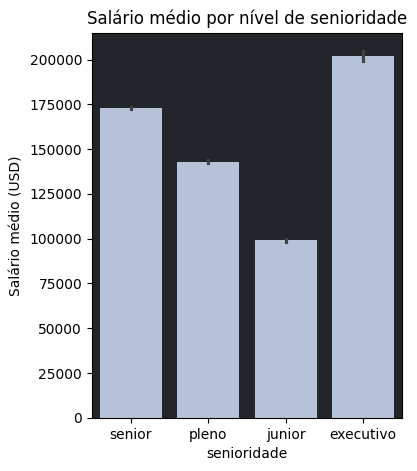

In [45]:
fig, ax = plt.subplots(figsize=(4, 5))
ax.set_facecolor('#222529')
sns.barplot(data=df_limpo, x='senioridade', y='usd', estimator='mean', color='#afc1de')
plt.title('Salário médio por nível de senioridade')
plt.ylabel('Salário médio (USD)')
plt.xlabel('senioridade')
plt.show()

In [46]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
executivo,202027.667813
senior,172850.838301
pleno,143044.845979
junior,99034.963267


In [47]:
ordem=df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

In [48]:
ordem

Index(['executivo', 'senior', 'pleno', 'junior'], dtype='object', name='senioridade')

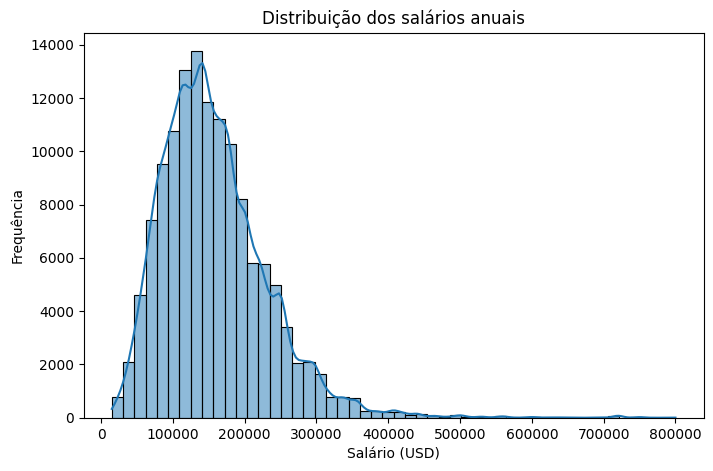

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(df_limpo['usd'], bins=50, kde=True)
plt.title('Distribuição dos salários anuais')
plt.ylabel('Frequência')
plt.xlabel('Salário (USD)')
plt.show()

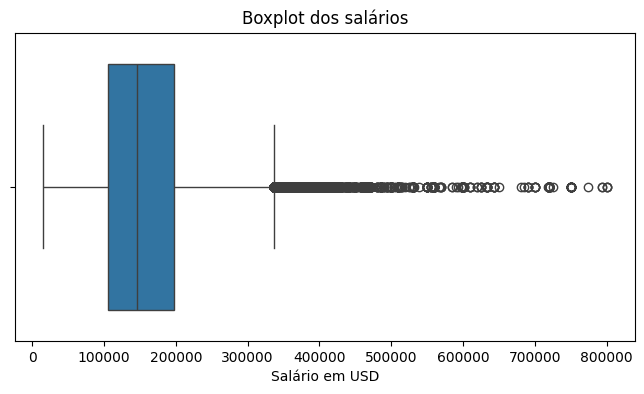

In [50]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot dos salários')
plt.xlabel('Salário em USD')
plt.show()

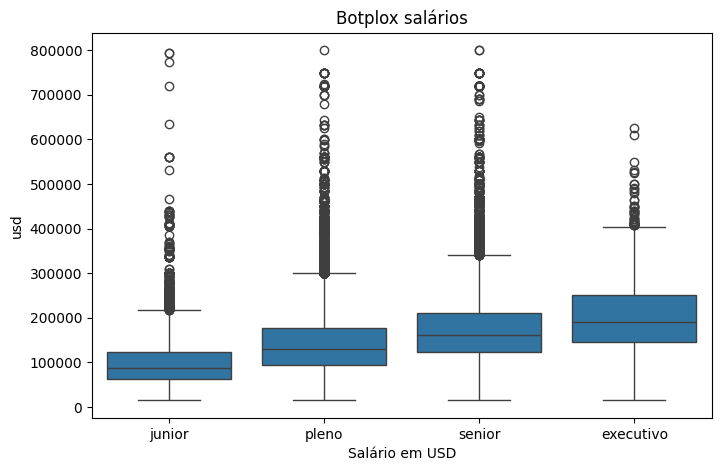

In [51]:
ordem_senioridade=['junior', 'pleno', 'senior', 'executivo']
plt.figure(figsize=(8, 5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title('Botplox salários')
plt.xlabel('Salário em USD')
plt.show()


In [52]:


df_avg_salary = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(df_avg_salary, x='senioridade', y='usd',
             title='Média Salarial por Nível de Senioridade (USD)',
             labels={'senioridade': 'Senioridade', 'usd': 'Salário Médio (USD)'})
fig.show()

In [53]:
df_avg_salary_country = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(df_avg_salary_country, x='senioridade', y='usd',
             title='Média Salarial por país',
             labels={'senioridade': 'Senioridade', 'usd': 'Salário Médio (USD)'})
fig.show()

In [54]:
df_limpo.head()


,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,localizacao,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [55]:
#função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
  try:
      return pycountry.countries.get(alpha_2=code).alpha_3
  except:
      return None



In [57]:
#criando uma nova coluna com o código (ISO-3)
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

In [58]:
#Calcular média salarial por país (Iso-3)

df_data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist']

df_avg_salary_country = df_data_scientist.groupby('residencia_iso3')['usd'].mean().reset_index()

fig = px.choropleth(df_avg_salary_country,
                    locations='residencia_iso3',
                    color='usd',
                    hover_name='residencia_iso3',
                    title='Salário Médio de Cientista de dados por País',
                    color_continuous_scale='rdylgn')
fig.show()

In [59]:
df_limpo.to_csv('dados-imersão-final.csv', index= False)